# Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


In [21]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Task:

In [2]:
df = pd.read_csv(r"F:\Drive\ExcelR\Assignments\KNN\KNN\Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


In [3]:
df_numeric = df.drop(columns='animal name')

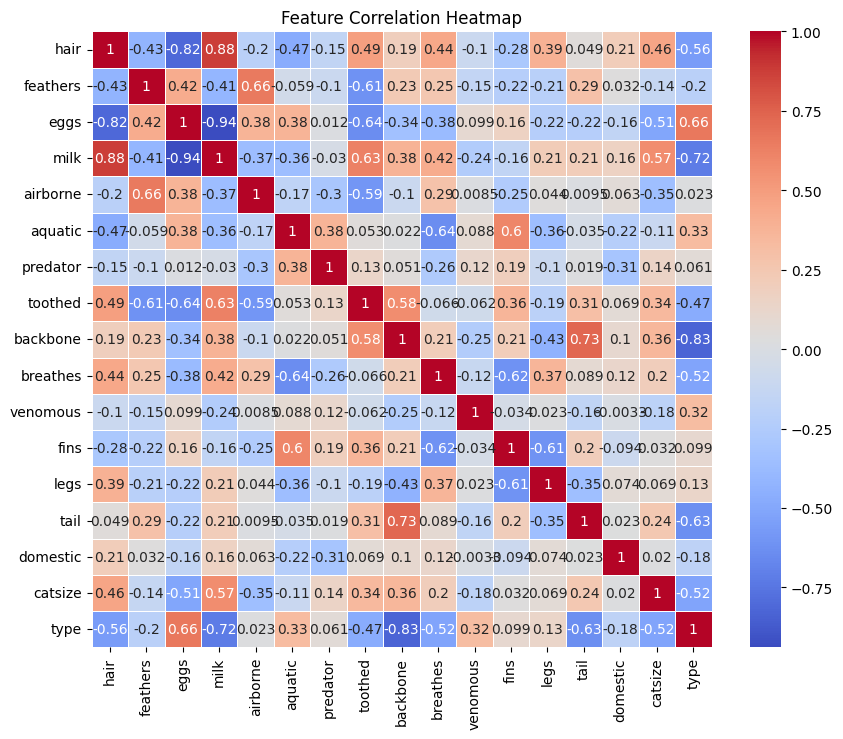

In [4]:
# Visualizing the correlation between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

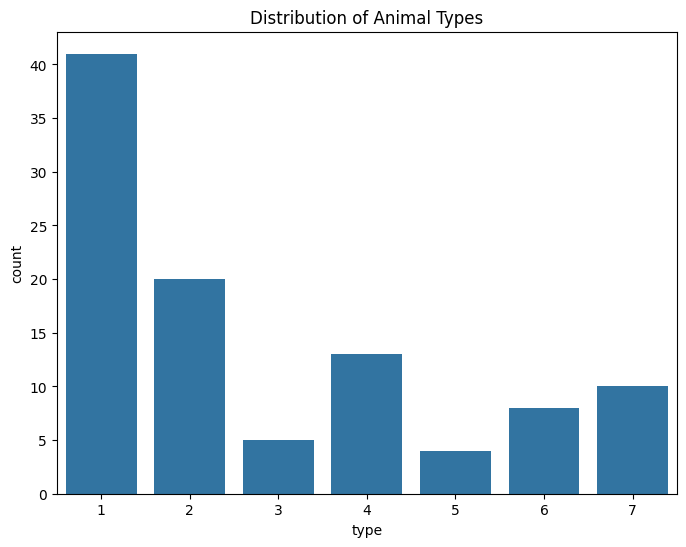

In [5]:
# Countplot of the target variable (Animal Type)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

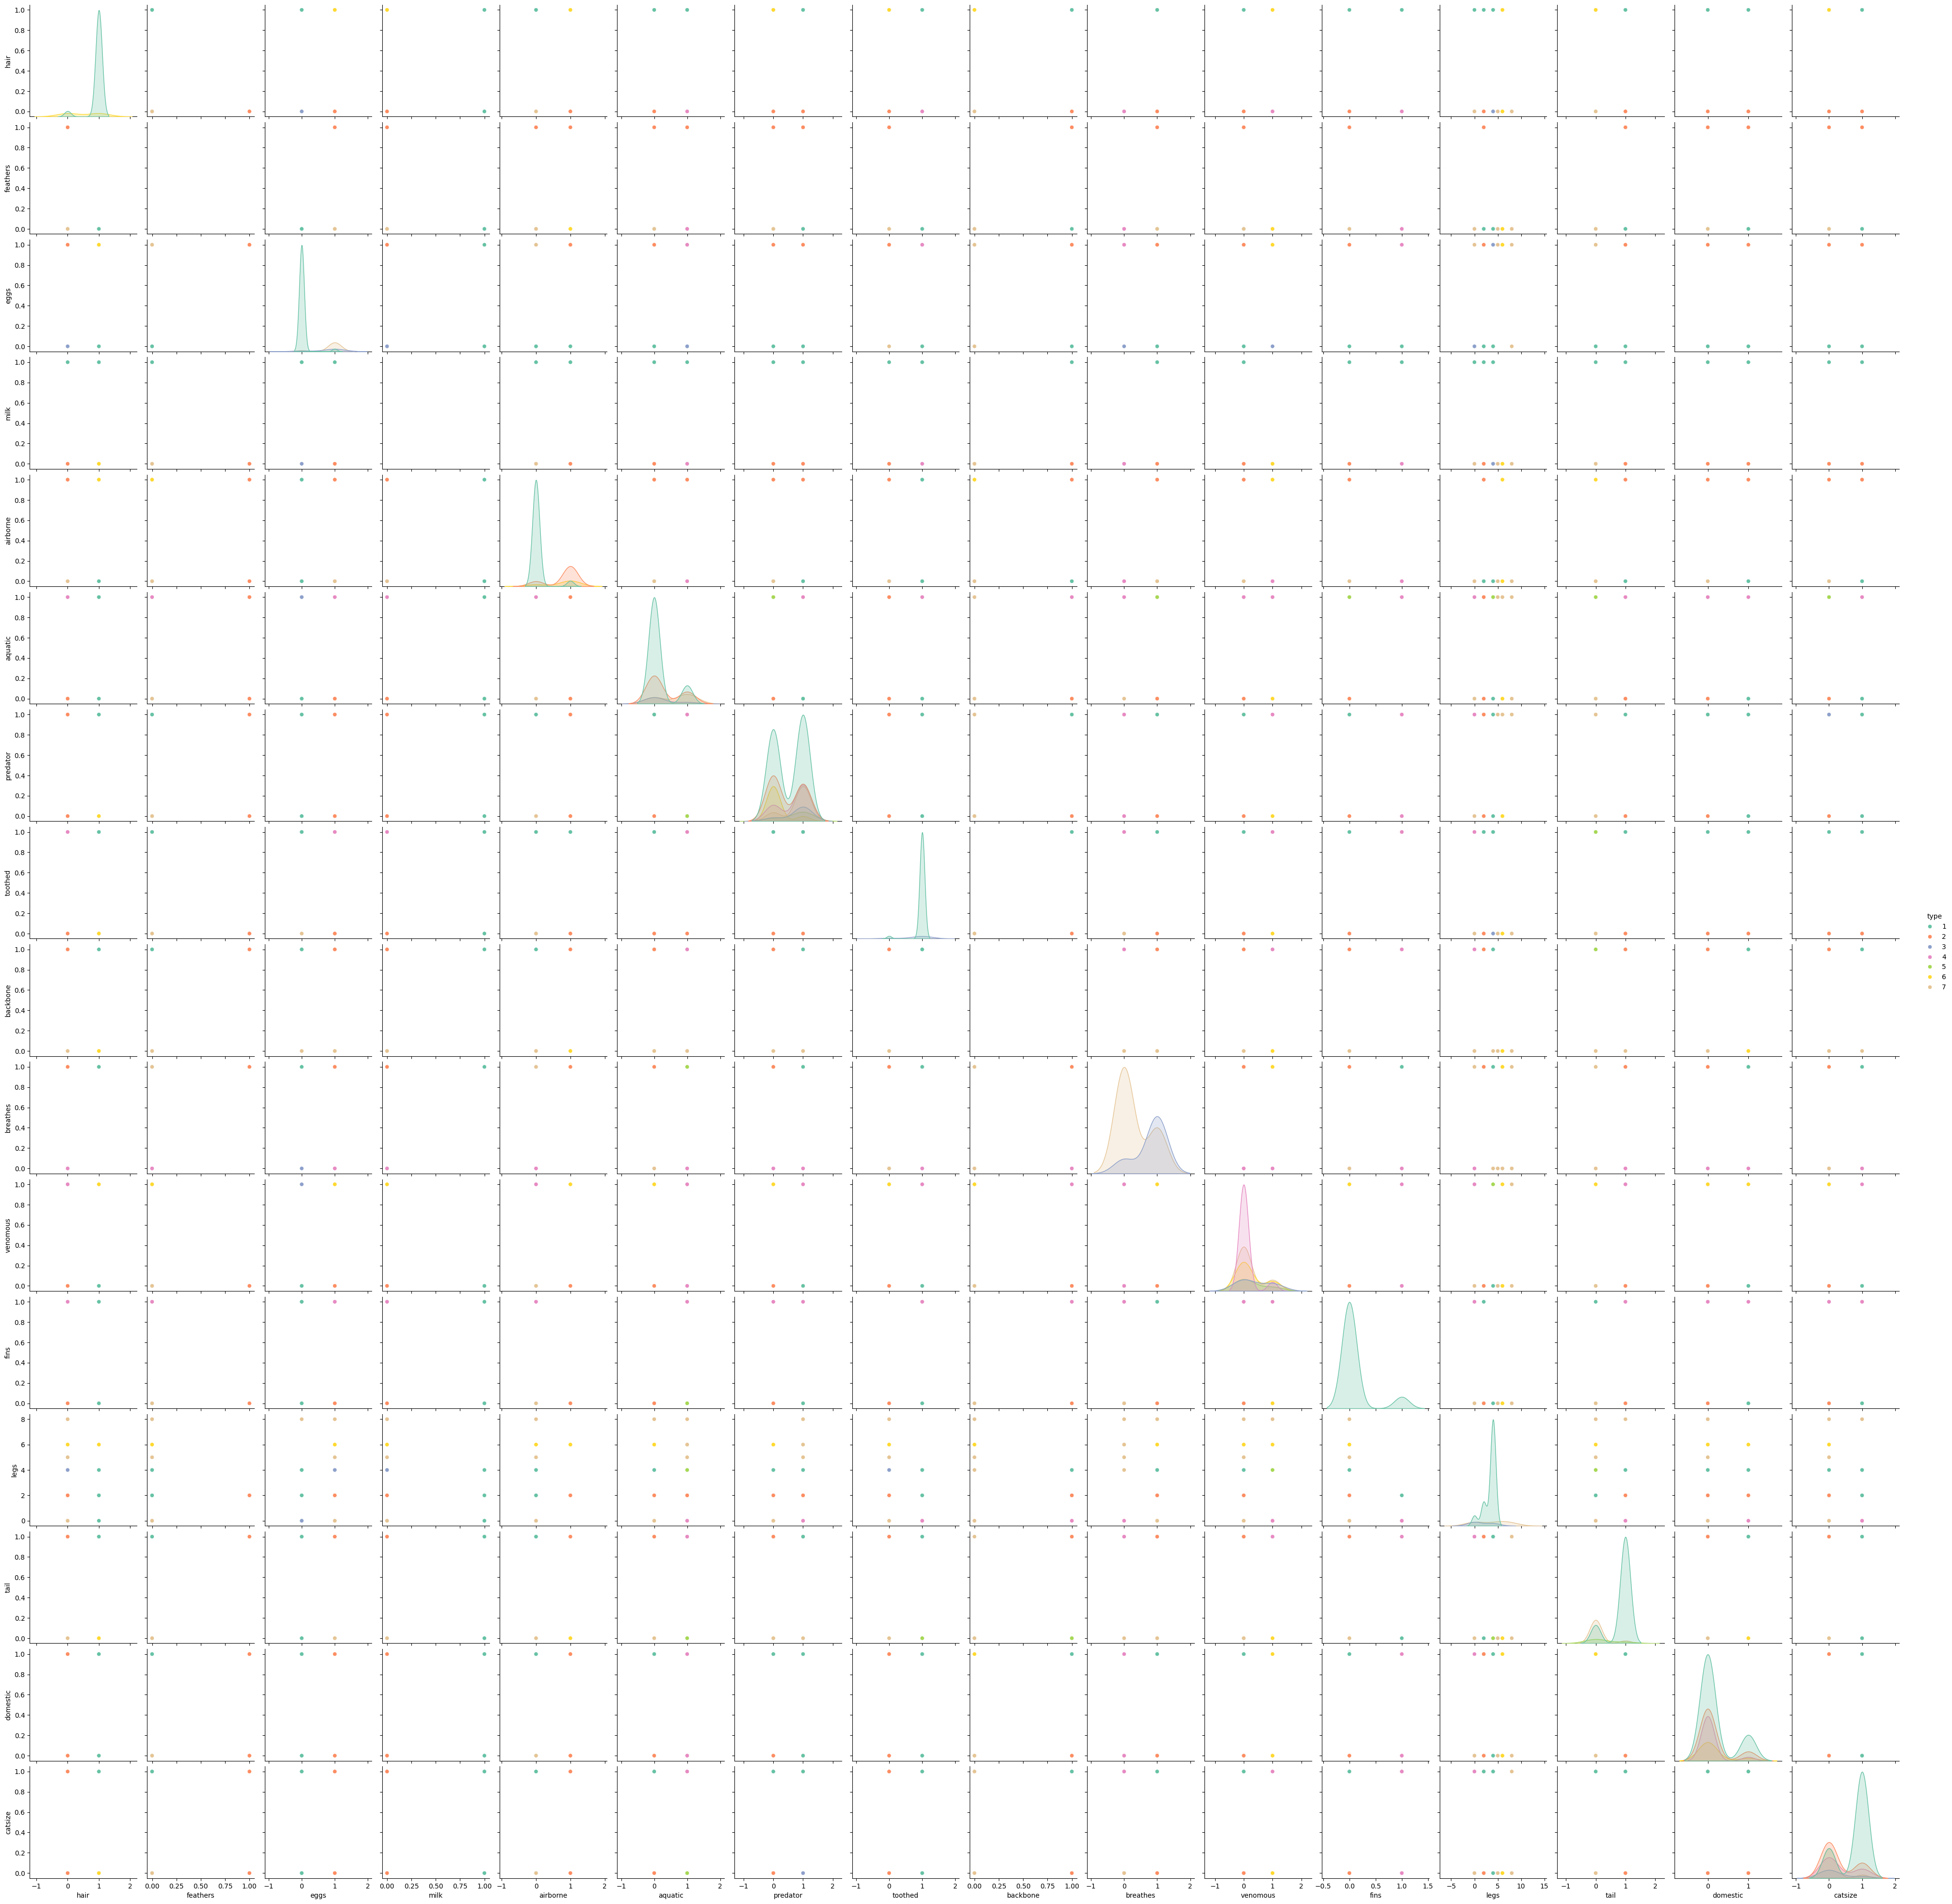

In [6]:
sns.pairplot(df.drop(columns=['animal name']), hue='type', palette="Set2")
plt.show()

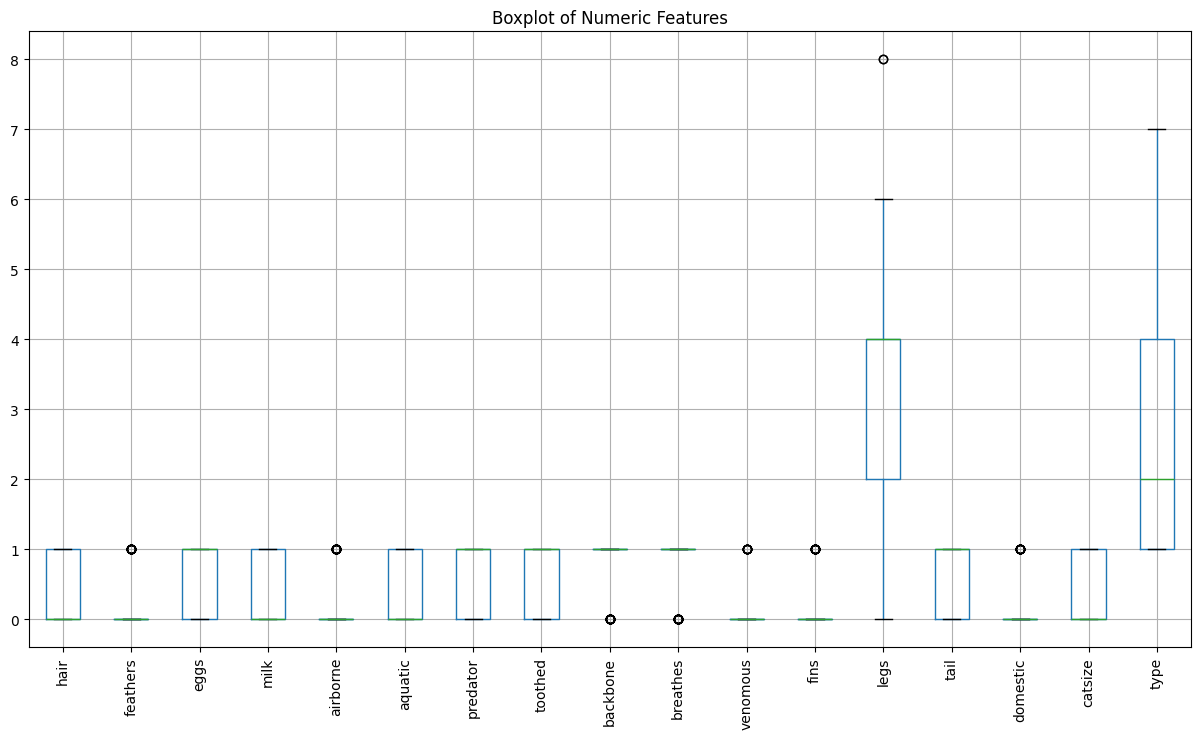

In [7]:
# Plot boxplots to see the distribution of the features
plt.figure(figsize=(15, 8))
df_numeric.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Features')
plt.show()

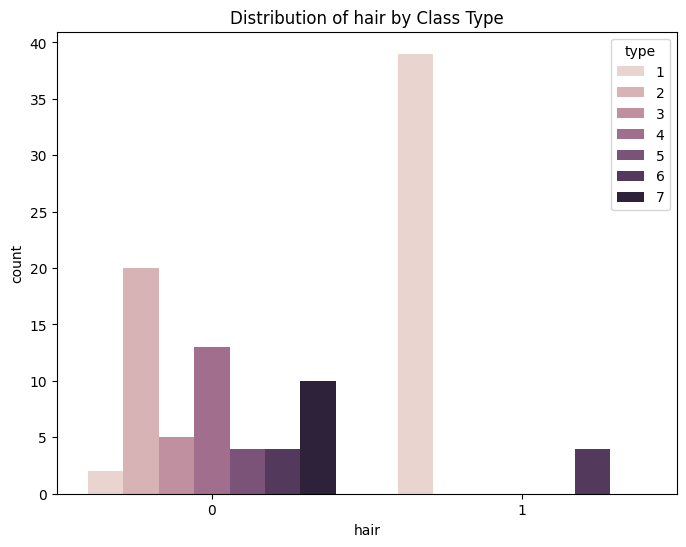

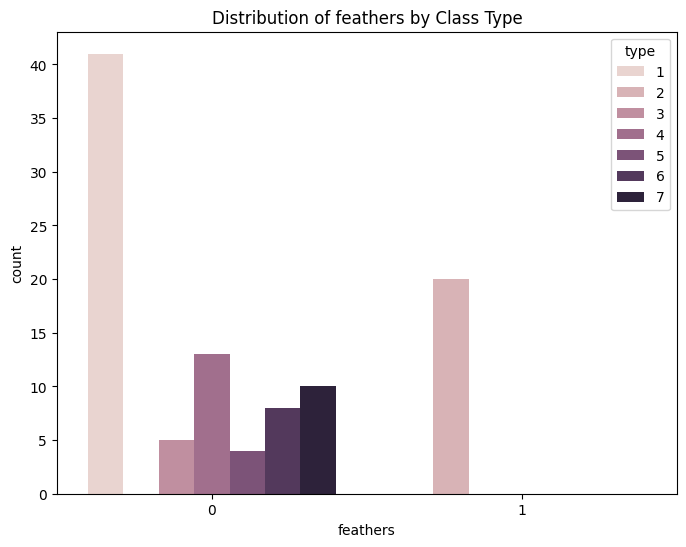

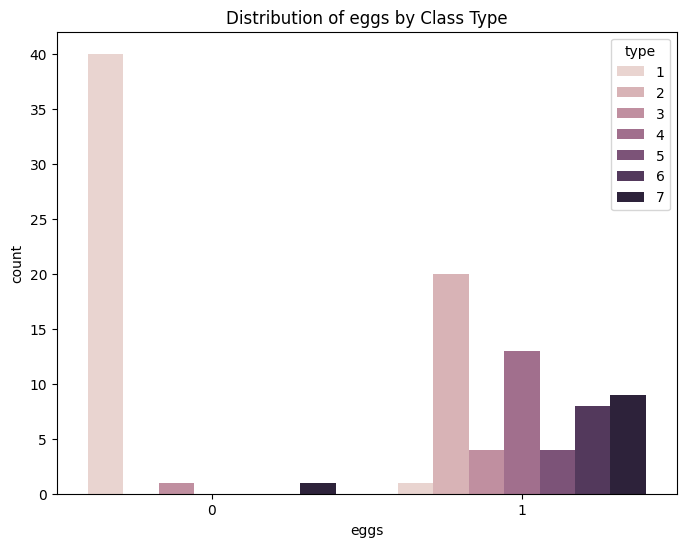

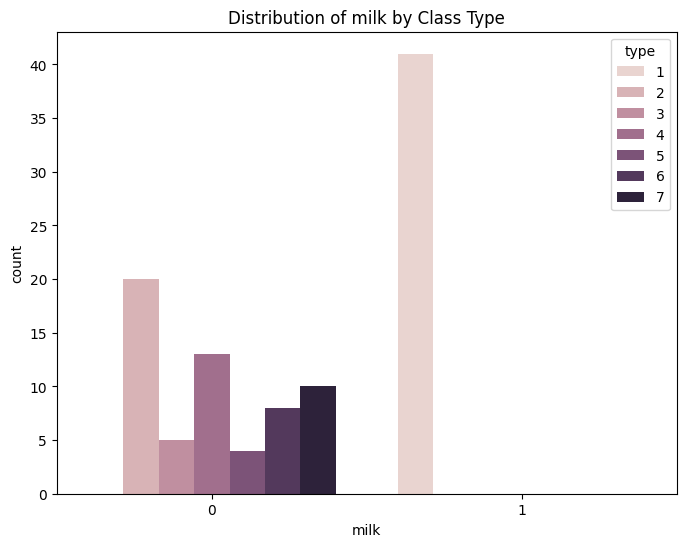

In [8]:
features_to_plot = ['hair', 'feathers', 'eggs', 'milk']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='type', data=df)
    plt.title(f'Distribution of {feature} by Class Type')
    plt.show()

In [9]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [10]:
# Split features and target variable
X = df.drop(columns=['animal name', 'type'])  # Features
y = df['type'] 

In [11]:
# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [14]:
# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [15]:
# Predict on test data
y_pred = knn.predict(X_test_scaled)

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9523809523809523


In [17]:
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.94      0.83      0.80        21
weighted avg       0.97      0.95      0.93        21



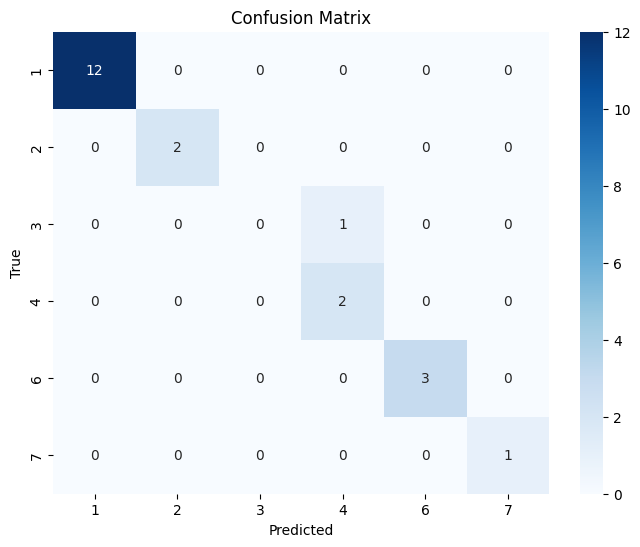

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)

In [23]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [24]:
# Retrain KNN on reduced dimensions
knn_pca = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [25]:
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
h = .02  # step size
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [27]:
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

In [28]:
Z = Z.reshape(xx.shape)

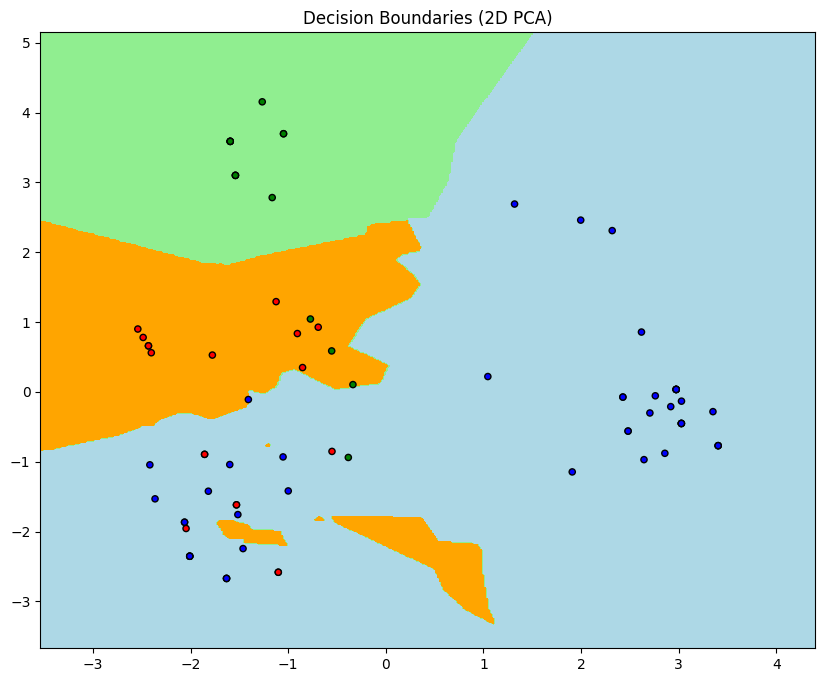

In [29]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightgreen', 'orange')))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', s=20, cmap=ListedColormap(('blue', 'green', 'red')))
plt.title('Decision Boundaries (2D PCA)')
plt.show()

# Interview Questions:

### 1. What are the key hyperparameters in KNN? 

**Key Hyperparameters in KNN:**

- **n_neighbors (K):** The number of neighbors to consider for classification.
- **Metric:** The distance function used to calculate the distance between points (e.g., Euclidean, Manhattan).
- **Weights:** Uniform (all neighbors have equal weight) or distance (closer neighbors are weighted more heavily)

### 2. What distance metrics can be used in KNN?

- **Euclidean Distance**
- **Manhattan Distance**
- **Minkowski Distance**